In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def RMSE_plot(ax_plt,data_plt,reg_sel,TO_PLOT,iplt,v_min,v_max,shift_days,clim_freq):
    # subplot panel labels
    panel_lett = ['a','b','c','d','e','f',
                 'g','h','i','j','k','l']
    # Palette
    test_pal = ['crimson','cornflower','teal','tangerine','lilac']
    sns.set_palette(sns.xkcd_palette(test_pal),5)
    # Line plot first
    sns.lineplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',
                 style='type',ax=ax_plt,markers=False,linewidth=3,legend=False if i < no_regions - 1 else 'full')
    # Scatter plot on top
    sns.scatterplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',style='type',
                             ax=ax_plt,legend=False,s=200)
    # 
    if clim_freq=='WEEKLY':
        shift_days_PLT = shift_days/7
    else:
        shift_days_PLT = shift_days
    ax_plt.axvline(x=shift_days_PLT,ymin=0,ymax=10,color='xkcd:charcoal',linewidth=4)
    ax_plt.grid()
    ax_plt.set_ylim((v_min,v_max))
    ax_plt.tick_params(axis='x', labelsize=17)
    ax_plt.tick_params(axis='y', labelsize=17)
    if iplt >= ncols*(nrows-1):
        ax_plt.set_xlabel('Lead Time (Weeks)',fontsize=25)
    else:
        ax_plt.set_xlabel(None)
    if np.mod(iplt,ncols)==0:
        ax_plt.set_ylabel('RMSE (10$^6$ km$^2$)',fontsize=25)
    else:
        ax_plt.set_ylabel(None)
    if iplt == no_regions-1:
        ax_plt.legend(bbox_to_anchor=(1.025,1),loc=2,borderaxespad=0,fontsize=30)
                      
    ax_plt.set_title('{lett}) {region}'.format(lett=panel_lett[iplt],region=reg_sel),fontsize=25)
    sns.despine(ax=ax_plt)

In [3]:
def RMSE_ratio_plot(ax_plt,data_plt,reg_sel,TO_PLOT,iplt,v_min,v_max,shift_days,clim_freq):
    # subplot panel labels
    panel_lett = ['a','b','c','d','e','f',
                 'g','h','i','j','k','l']
    # Palette
    test_pal = ['crimson','cornflower','teal','tangerine','lilac']
    sns.set_palette(sns.xkcd_palette(test_pal),5)
    # Line plot first
    sns.lineplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',
                 ax=ax_plt,markers=False,linewidth=3,legend=False if i < no_regions - 1 else 'full')
    # Scatter plot on top
    sns.scatterplot(data=data_plt,x='lead days',y=TO_PLOT,hue='Model Name',
                             ax=ax_plt,legend=False,s=200)
    # add horizontal line
    if clim_freq=='WEEKLY':
        shift_days_PLT = shift_days/7
    else:
        shift_days_PLT = shift_days
    ax_plt.axhline(y=1,xmin=0,xmax=50,color='k',linewidth=4.8)
    ax_plt.axvline(x=shift_days_PLT,ymin=0,ymax=10,color='xkcd:charcoal',linewidth=4)
    ax_plt.text(shift_days_PLT+0.2,v_min+0.5,'VRILE begins',fontsize=26)
    ax_plt.grid()
    ax_plt.set_ylim((v_min,v_max))
    ax_plt.tick_params(axis='x', labelsize=17)
    ax_plt.tick_params(axis='y', labelsize=17)
    if iplt >= ncols*(nrows-1):
        ax_plt.set_xlabel('Lead Time (Weeks)',fontsize=25)
    else:
        ax_plt.set_xlabel(None)
    if np.mod(iplt,ncols)==0:
        ax_plt.set_ylabel(r'RMSE($\frac{VRILE}{NO VRILE}$)',fontsize=25)
    else:
        ax_plt.set_ylabel(None)
    if iplt == no_regions-1:
        ax_plt.legend(bbox_to_anchor=(1.025,1),loc=2,borderaxespad=0,fontsize=30)
                      
    ax_plt.set_title('{lett}) {region}'.format(lett=panel_lett[iplt],region=reg_sel),fontsize=25)
    sns.despine(ax=ax_plt)

In [25]:
#model_names = ['ecmwf','metreofr','ukmo','ncep']
ALL_REGIONS = False 
model_names = ['ecmwf','ncep','metreofr','ukmo']#,'ukmo','metreofr','ncep']
seas_str = 'JJA'
#seas_str2 = 'SON'
#seas_sel2 = [9,10,11]
seas_sel = [6,7,8]
thresh_str = '05'
clim_freq_str = 'WEEKLY'
TO_PLOT = 'SIE anom MAE'
VRILE_shift = 21
obs_name = 'NSIDC_0079'
max_date_offset = 7

### Steps
1. Load on RMSE spreadsheets for all days and VRILE days, and combine all models into one spreadsheet 
2. Make postage stamp plot for each region comparing all days to VRILE days
3. Plot select regions for paper



Load spreadsheets

In [26]:
d_SIE_all = pd.DataFrame()
#d_SIE_all_seas2 = pd.DataFrame()
fpath_load = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/'

for i_model in model_names:
    # Load ALL DAYS
    fpath_allm = fpath_load+'{model_name}/OBS_{obs_name}/'.format(model_name=i_model,obs_name=obs_name)
    if clim_freq_str == 'WEEKLY':
        fpath_all = fpath_allm+"lead_time_WEEKS/ERROR_PROP_VRILE_vs_NOVRILE_RMSE_MAE_{model_name}_months{seas_str}_offset_"\
        "{max_date_offset}days_VRILE{thresh_str}_SHIFT_{VRILE_shift}days_model_clim_freq_{clim_freq_str}.csv".format(model_name=i_model,
                                                seas_str=seas_str,thresh_str=thresh_str,max_date_offset=max_date_offset,
                                                VRILE_shift=VRILE_shift,clim_freq_str=clim_freq_str)
    else:
        fpath_all = fpath_allm+"ERROR_PROP_VRILE_vs_NOVRILE_RMSE_MAE_{model_name}_months{seas_str}_offset_"\
        "{max_date_offset}days_VRILE{thresh_str}_SHIFT_{VRILE_shift}days_model_clim_freq_{clim_freq_str}.csv".format(model_name=i_model,
                                                seas_str=seas_str,thresh_str=thresh_str,max_date_offset=max_date_offset,
                                                VRILE_shift=VRILE_shift,clim_freq_str=clim_freq_str)
    d_SIE = pd.read_csv(fpath_all)
    print('reading ',fpath_all)
    # Because we spelled "meteofr" wrong
    if i_model == 'metreofr':
        d_SIE['Model Name'] = 'meteofr'
    elif i_model == 'DAMPED_ANOMALY':
        d_SIE['Model Name'] = 'Damped Anomaly'
    else:
        d_SIE['Model Name'] = i_model
    # 
    d_SIE_all = d_SIE_all.append(d_SIE)

reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/ecmwf/OBS_NSIDC_0079/lead_time_WEEKS/ERROR_PROP_VRILE_vs_NOVRILE_RMSE_MAE_ecmwf_monthsJJA_offset_7days_VRILE05_SHIFT_21days_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/ncep/OBS_NSIDC_0079/lead_time_WEEKS/ERROR_PROP_VRILE_vs_NOVRILE_RMSE_MAE_ncep_monthsJJA_offset_7days_VRILE05_SHIFT_21days_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/metreofr/OBS_NSIDC_0079/lead_time_WEEKS/ERROR_PROP_VRILE_vs_NOVRILE_RMSE_MAE_metreofr_monthsJJA_offset_7days_VRILE05_SHIFT_21days_model_clim_freq_WEEKLY.csv
reading  /home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/ukmo/OBS_NSIDC_0079/lead_time_WEEKS/ERROR_PROP_VRILE_vs_NOVRILE_RMSE_MAE_ukmo_monthsJJA_offset_7days_VRILE05_SHIFT_21days_model_clim_freq_WEEKLY.csv


Trim regions

In [27]:
regions_all = d_SIE_all['region'].unique().tolist()
regions_drop = ['St John','Hudson Bay','Canadian Islands','Bering','Sea of Okhotsk']
regions_sel = d_SIE_all[~d_SIE_all['region'].isin(regions_drop)]['region'].unique().tolist()
if ALL_REGIONS == True:
    regions_list = regions_sel
    ncols = 5
    reg_save_str = 'REG_ALL'
    fpath_save = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/RMSE_VRILE_days_vs_all_days/BY_WEEK/'
    ftype = 'pdf'
else:
    regions_list = ['panArctic','Barents Sea','East Greenland Sea','Central Arctic','Kara-Laptev Sea',
                     'East Siberian-Beaufort-Chukchi Sea']
    ncols = 2
    reg_save_str = 'REG_TRIM'
    fpath_save = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/RMSE_VRILE_days_vs_all_days/BY_WEEK/'
    ftype='pdf'
if not os.path.exists(fpath_save):
    os.makedirs(fpath_save)

In [28]:
d_SIE_all = d_SIE_all[~d_SIE_all['region'].isin(regions_drop)]
#

Shorten region names and replace to plot in desired order

In [29]:
d_SIE_all['region'] = d_SIE_all['region'].replace({'East Greenland Sea':'E. Greenland Sea',
    'East Siberian-Beaufort-Chukchi Sea':'E. Sib./Beauf./Chuk. Sea'})
#
regions_sort = ["panArctic","Central Arctic","E. Sib./Beauf./Chuk. Sea","Kara-Laptev Sea","Barents Sea","E. Greenland Sea"]
d_SIE_all['region sort'] = pd.Categorical(d_SIE_all['region'],regions_sort)

Group by region, lead day, model, and type (VRILE or non-VRILE days)

In [30]:
d_SIE_all_gb = d_SIE_all.groupby(['region sort','Model Name','type','lead days']).mean()

In [31]:
if TO_PLOT == 'SIE MAE':
    title_str = 'Sea Ice Extent'
    save_str = 'SIE'
else:
    title_str = 'Anomalous Sea Ice Extent'
    save_str = 'SIE_anom'

In [36]:
d_SIE_all_gb.xs(('Central Arctic'))

SIE RMSE  SIE anom RMSE   SIE MAE  \
Model Name type          lead days                                      
ecmwf      VRILE days    0.0        0.075107       0.018771  0.072869   
                         1.0        0.084938       0.038818  0.078100   
                         2.0        0.089881       0.058351  0.077835   
                         3.0        0.093557       0.076288  0.078714   
                         4.0        0.098289       0.091251  0.081081   
...                                      ...            ...       ...   
ukmo       no VRILE days 4.0        0.115347       0.077672  0.058131   
                         5.0        0.141035       0.089613  0.066415   
                         6.0        0.164659       0.099608  0.074038   
                         7.0        0.182893       0.104346  0.080237   
                         8.0        0.192096       0.105405  0.084117   

                                    SIE anom MAE  
Model Name type          lead days                
ecmwf      VRILE days    0.0            0.014143  
                         1.0            0.027675  
                         2.0            0.043293  
                         3.0            0.058165  
                         4.0            0.071088  
...                                          ...  
ukmo       no VRILE days 4.0            0.031060  
                         5.0            0.034842  
                         6.0            0.038498  
                         7.0            0.040066  
                         8.0            0.040892  

[72 rows x 4 columns]

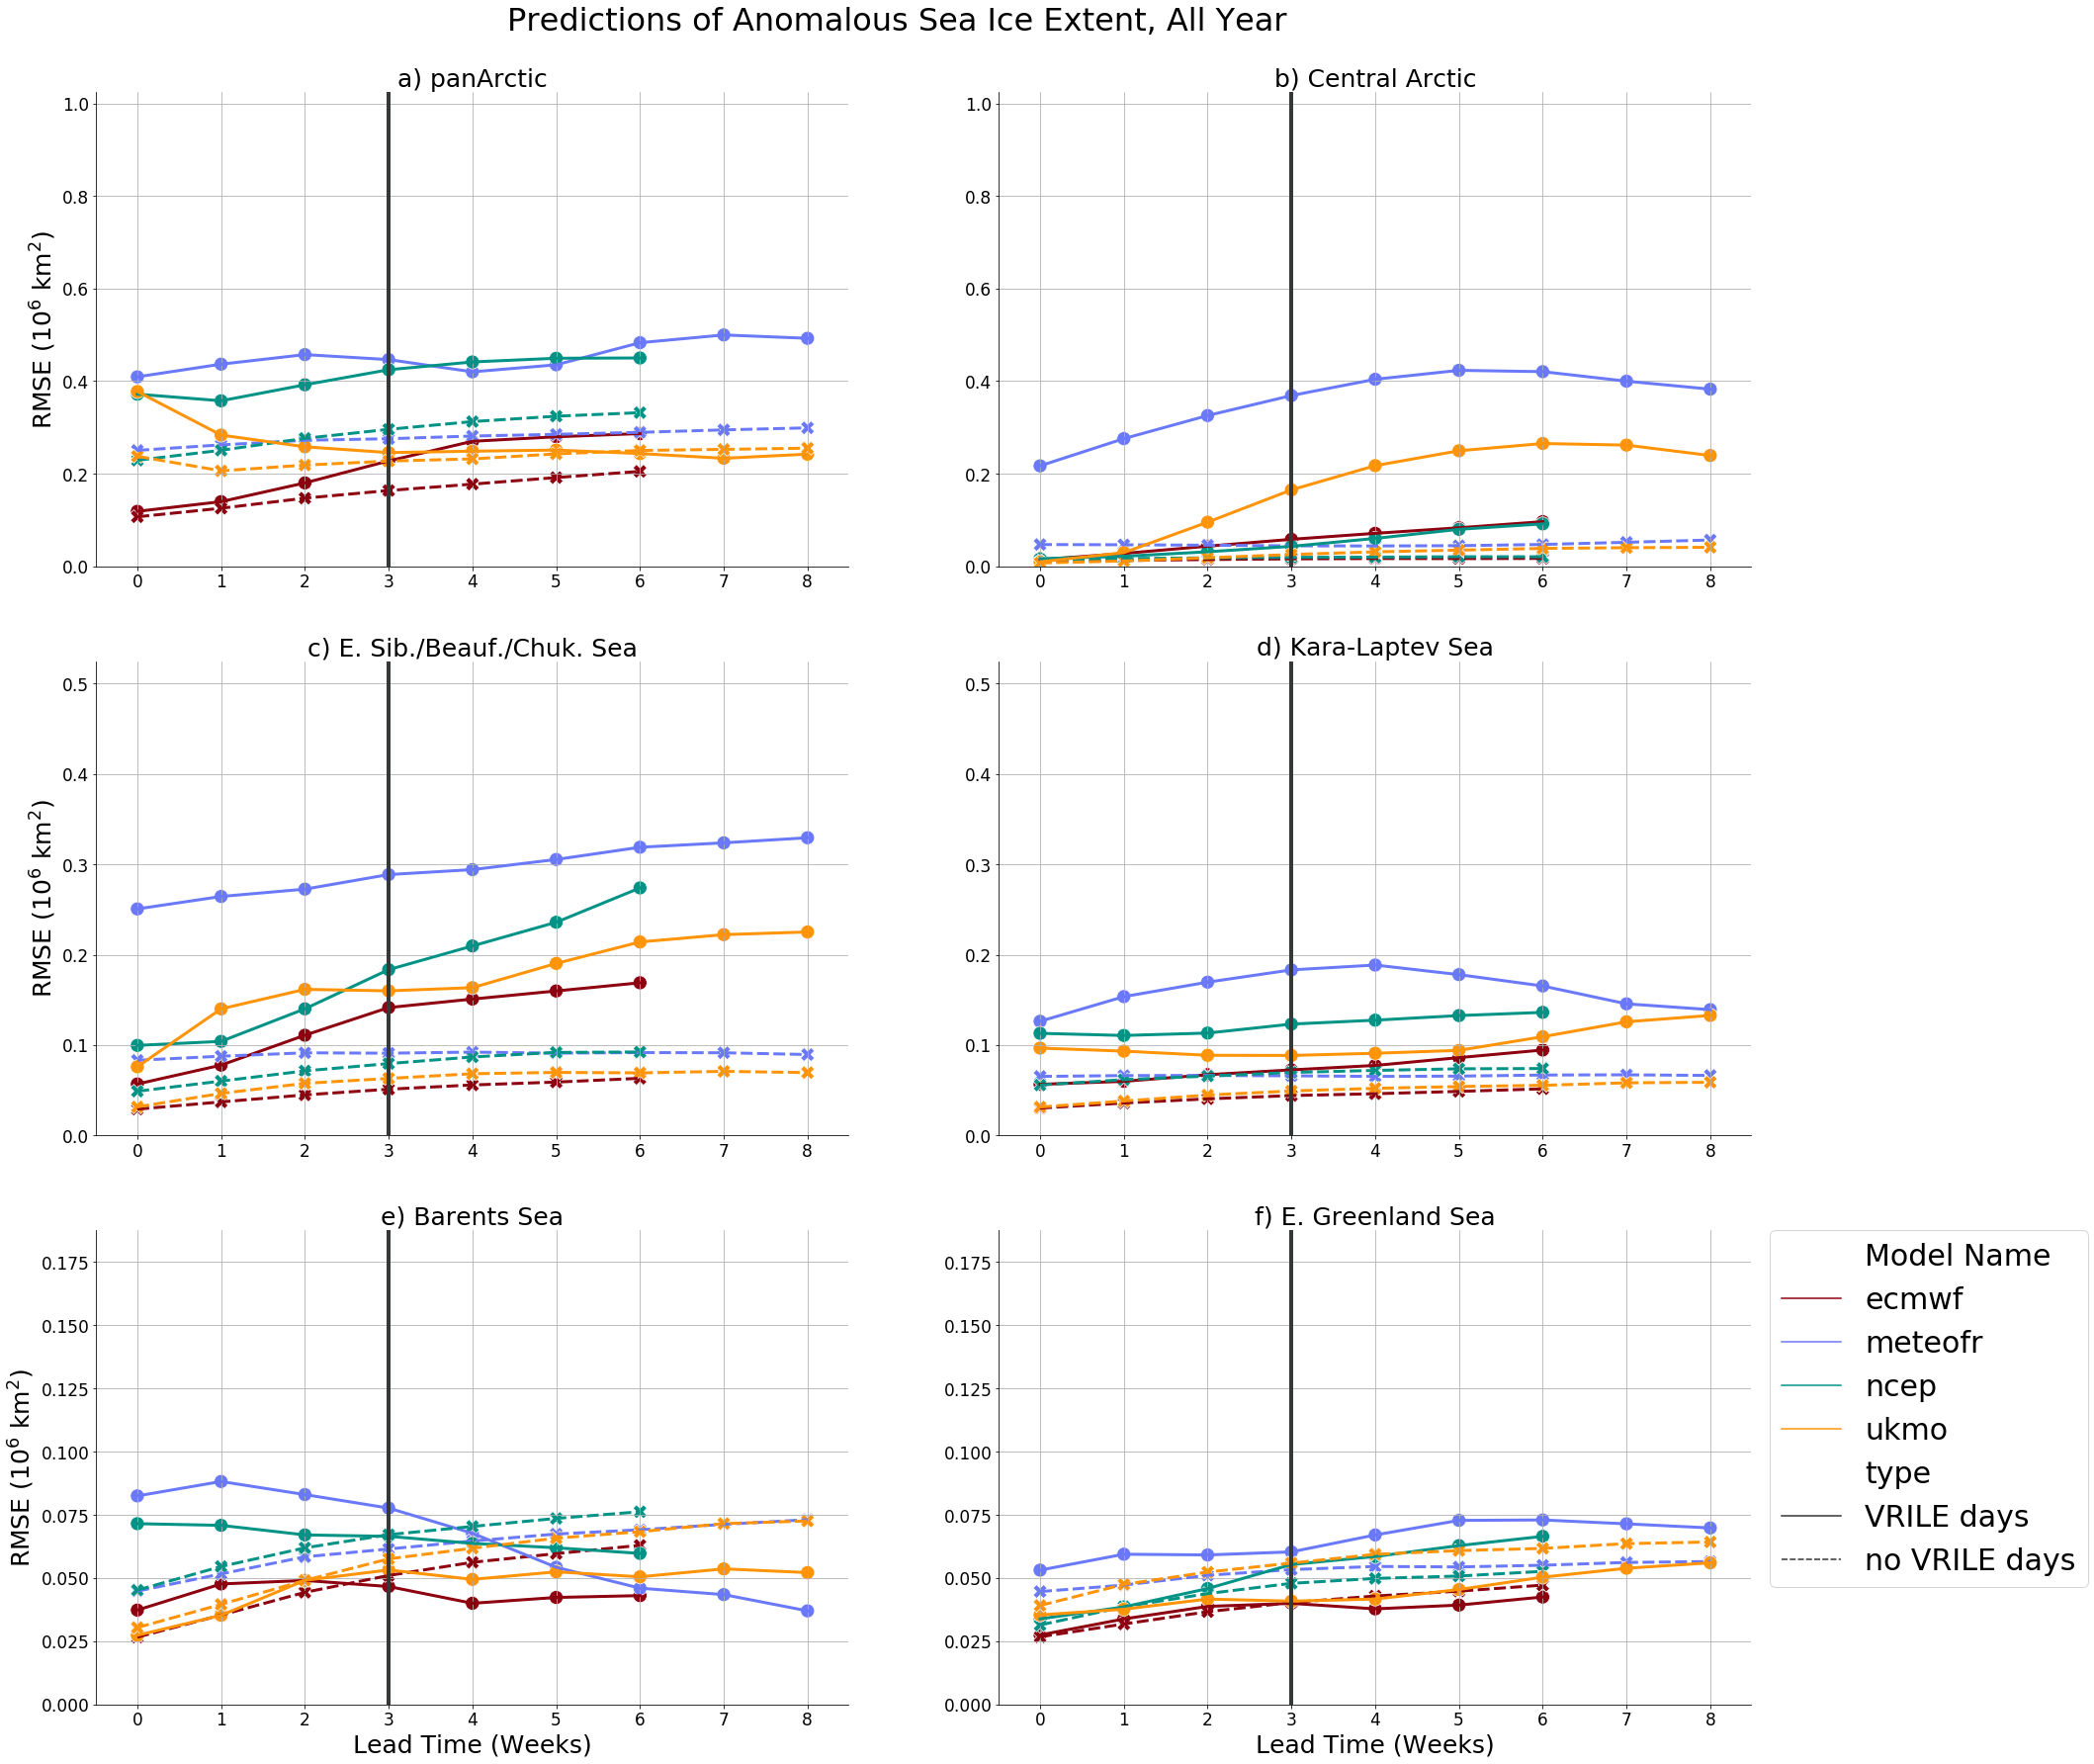

In [33]:
nrows = 3
no_regions = len(regions_sort)
if TO_PLOT == 'SIE MAE':
    vmax = [3.05,2.05,2.05,1.05,0.375,0.375]
else:
    vmax = [2.05/2,2.05/2,1.05/2,1.05/2,0.375/2,0.375/2]
vmin = 0
#vmax = [2,2,2,1,1,1]
fig1,ax1 = plt.subplots(nrows,ncols,figsize=(30,30))
for i in range(0,no_regions):
    ax_sel = ax1.flat[i]
    i_reg = np.floor(i).astype(int)
    reg_sel = regions_sort[i_reg]
    data_sel = d_SIE_all_gb.xs((reg_sel)).reset_index()
    # Plot
    RMSE_plot(ax_sel,data_sel,reg_sel,TO_PLOT,i,vmin,vmax[i_reg],VRILE_shift,clim_freq_str)
#fig1.tight_layout()
if TO_PLOT == 'SIE MAE':
    fig1.suptitle('Predictions of Sea Ice Extent, All Year',fontsize=32,y=0.92)
else:
    fig1.suptitle('Predictions of Anomalous Sea Ice Extent, All Year',fontsize=32,y=0.92)
#fig1.text(0.275,0.9,'All Year',fontsize=28)
#fig1.text(0.7,0.9,'{seas_str} Only'.format(seas_str=seas_str2),fontsize=28)
fpath_save1 = "/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/"\
"ERROR_PROP_RMSE_{save_str}_seas{seas_str}_VRILES_shift{VRILE_shift}_VRILE_thresh{thresh_str}.pdf".format(save_str=save_str,
                                     seas_str=seas_str,VRILE_shift=VRILE_shift,
                                     thresh_str=thresh_str)

#fig1.savefig(fpath_save1,format='pdf',bbox_inches='tight')

In [37]:
ratios = d_SIE_all_gb.xs('VRILE days',level=2).divide(d_SIE_all_gb.xs('no VRILE days',level=2))
ratios.xs('Central Arctic')

SIE RMSE  SIE anom RMSE   SIE MAE  SIE anom MAE
Model Name lead days                                                 
ecmwf      0.0        1.250058       0.992931  1.306196      1.414787
           1.0        1.341491       1.602041  1.369002      2.217697
           2.0        1.483466       2.120618  1.464367      2.987549
           3.0        1.565926       2.580817  1.535079      3.644654
           4.0        1.620111       3.026140  1.565271      4.266163
           5.0        1.718440       3.474297  1.717971      5.036892
           6.0        1.818652       3.763696  1.777851      5.702498
           7.0             NaN            NaN       NaN           NaN
           8.0             NaN            NaN       NaN           NaN
meteofr    0.0        3.421586       3.043372  5.205925      4.628204
           1.0        4.380806       3.656693  6.867283      5.947786
           2.0        5.342245       4.267671  8.090156      7.164229
           3.0        6.402092       5.007039  8.973192      8.371813
           4.0        7.080355       5.613504  9.408563      9.228204
           5.0        6.982405       5.851994  9.097325      9.520705
           6.0        6.021078       5.549280  8.109995      8.943995
           7.0        4.761675       4.825689  6.687574      7.733691
           8.0        3.884097       4.174992  5.655538      6.753910
ncep       0.0        0.905937       0.807162  1.112542      1.147293
           1.0        1.481309       0.900139  1.716996      1.302063
           2.0        2.482987       1.382199  3.240651      1.716997
           3.0        3.223887       1.844083  4.731488      2.231461
           4.0        3.862795       2.371657  5.999064      3.048670
           5.0        4.493082       2.996188  7.007742      3.883029
           6.0        5.273877       3.475846  8.133980      4.467496
           7.0             NaN            NaN       NaN           NaN
           8.0             NaN            NaN       NaN           NaN
ukmo       0.0        1.017090       0.988740  1.003831      1.338284
           1.0        2.169156       2.116572  1.968580      2.599065
           2.0        3.604043       3.159193  4.070303      5.205775
           3.0        4.400199       3.618025  6.048727      6.523274
           4.0        4.733516       3.753793  7.483779      6.998597
           5.0        4.674426       3.692233  8.004761      7.162125
           6.0        4.372855       3.460304  7.966868      6.889442
           7.0        3.962880       3.252520  7.327434      6.533711
           8.0        3.586701       3.048301  6.552564      5.850246

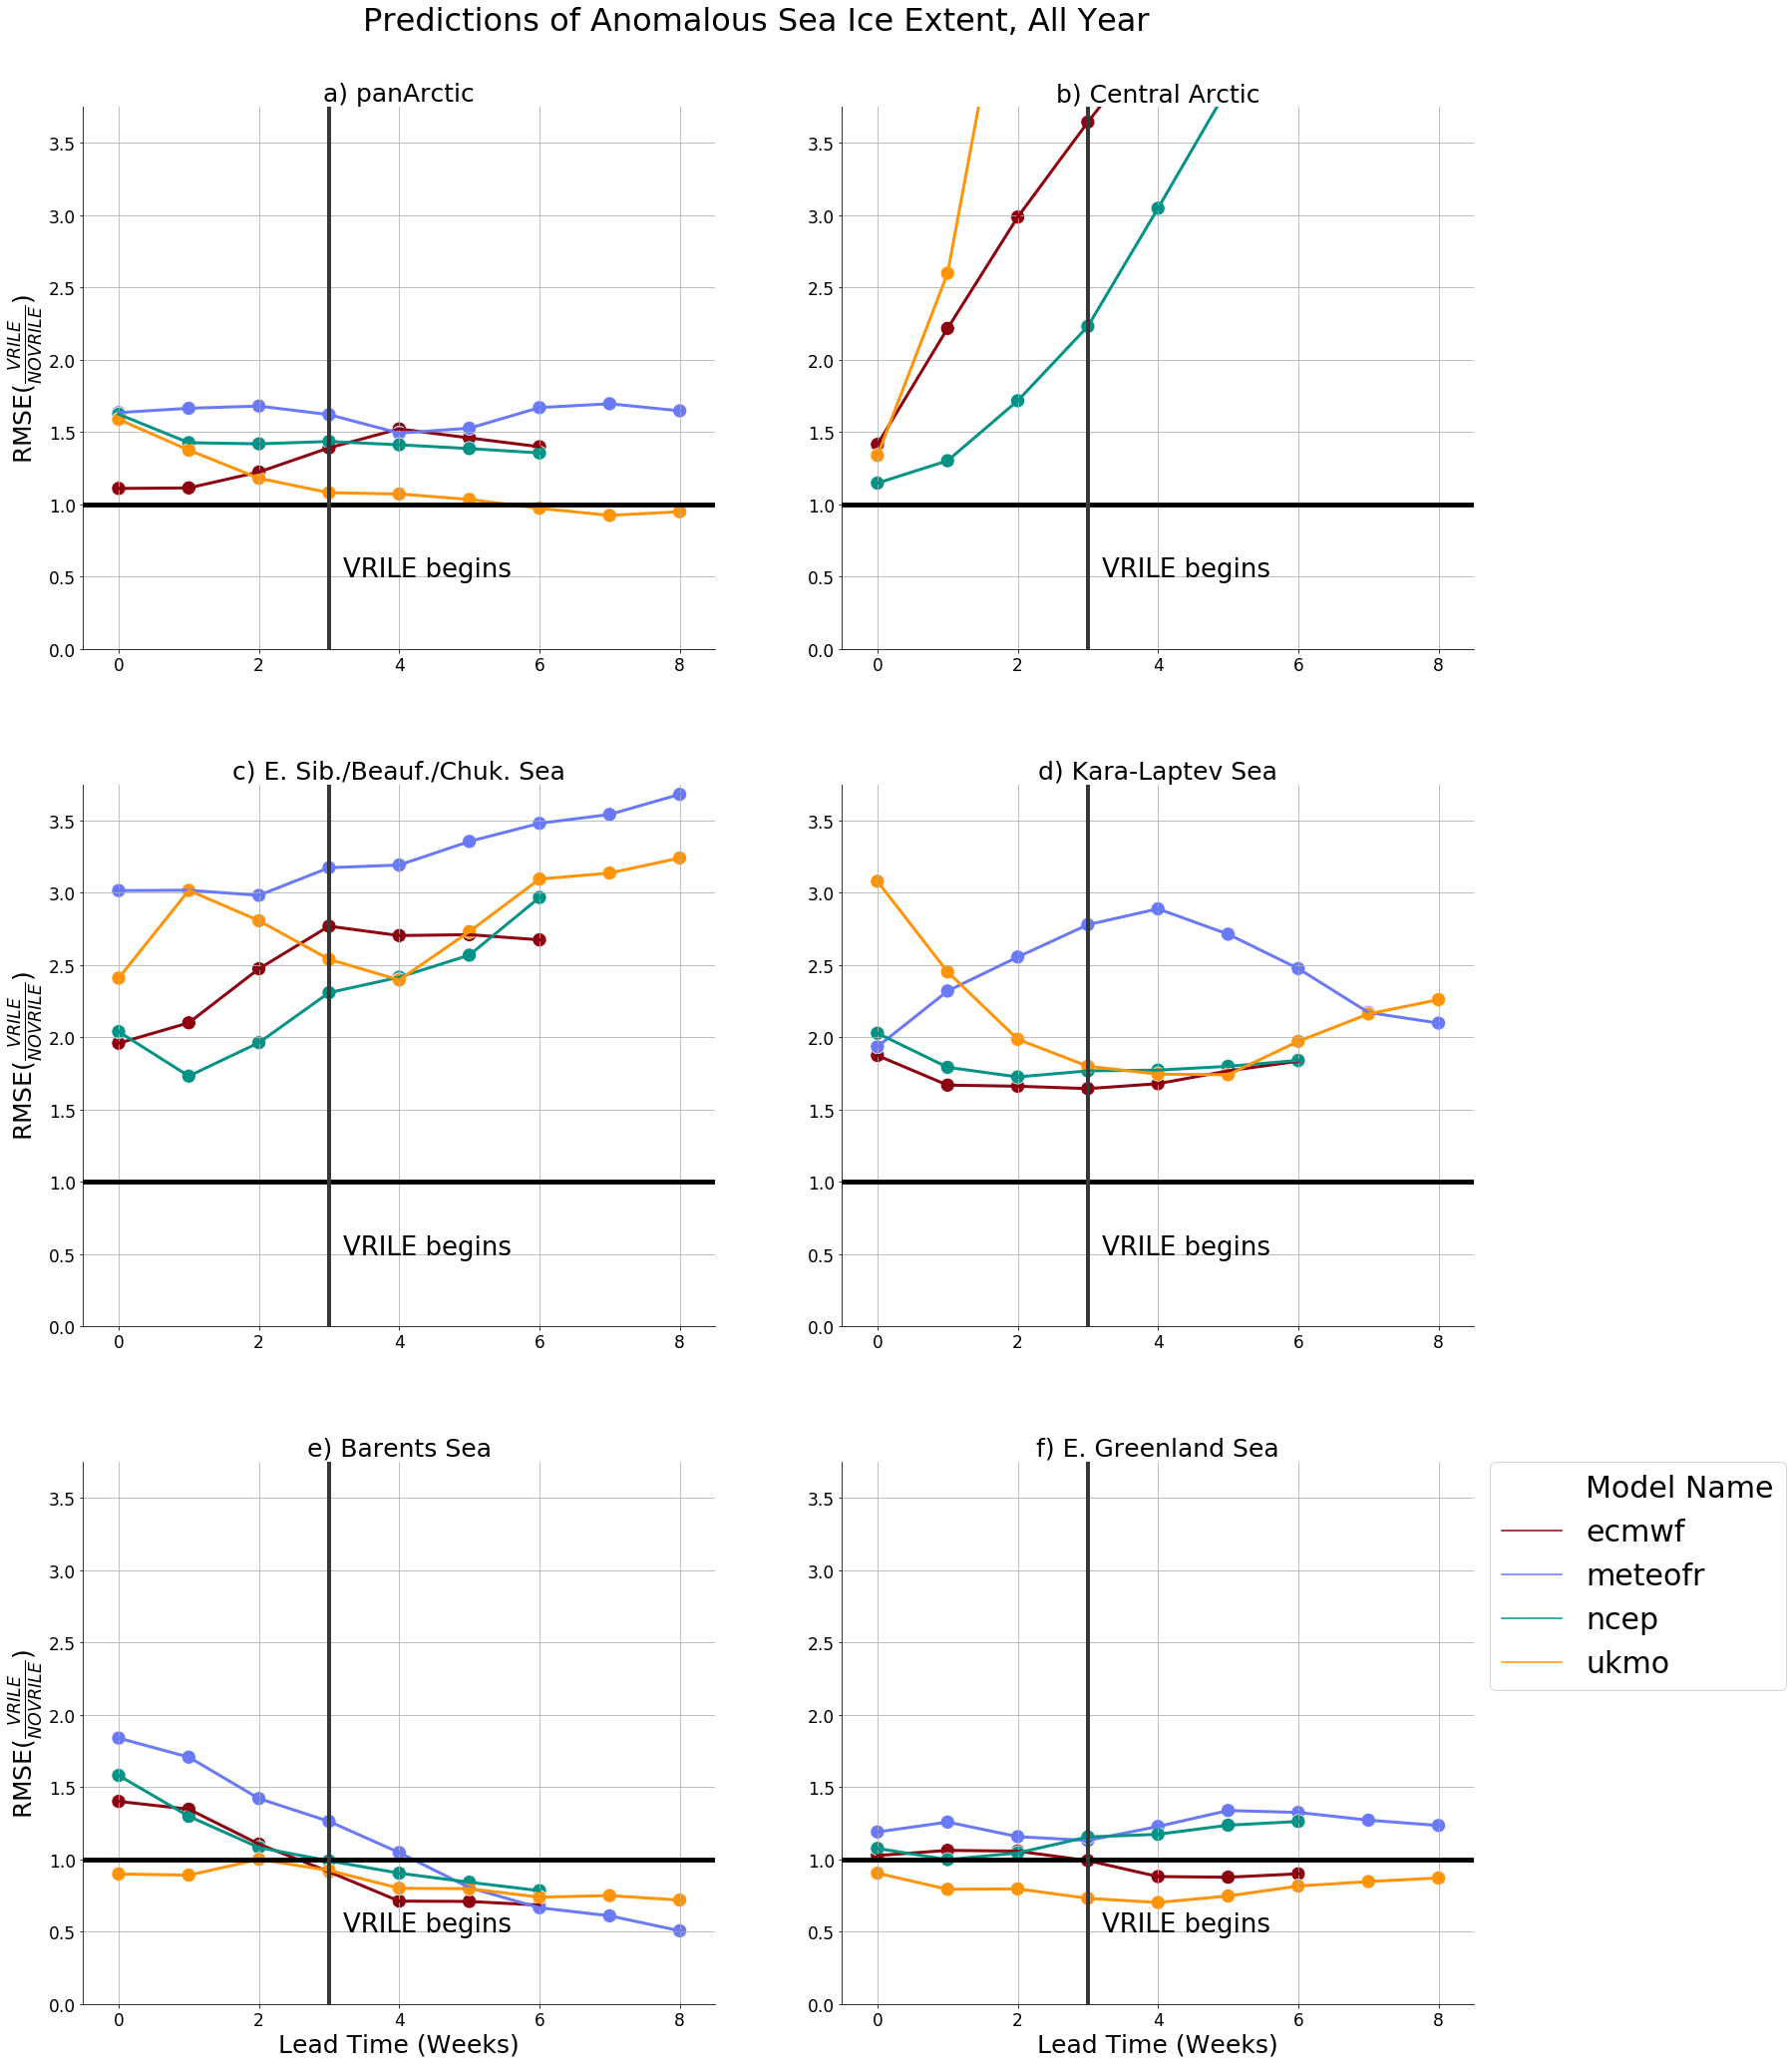

In [35]:
fig2,ax2 = plt.subplots(nrows,ncols,figsize=(25,35))
for i in range(0,no_regions):
    ax_sel = ax2.flat[i]
    i_reg = np.floor(i).astype(int)
    reg_sel = regions_sort[i_reg]
    data_sel = ratios.xs((reg_sel)).reset_index()

    # Plot
    if TO_PLOT == 'SIE anom MAE':
        v_max = 3.75
    elif (TO_PLOT == 'SIE MAE') & (reg_sel == 'Central Arctic'):
        v_max = 8.05
    elif (TO_PLOT == 'SIE MAE') & (reg_sel == 'E. Sib./Beauf./Chuk. Sea'):
        v_max = 3.55
    elif (TO_PLOT == 'SIE MAE'):
        v_max = 2.95
    if clim_freq_str == 'WEEKLY':
        shift_days_plt = VRILE_shift/7
    else:
        shift_days_plt = VRILE_shift
    RMSE_ratio_plot(ax_sel,data_sel,reg_sel,TO_PLOT,i,vmin,v_max,VRILE_shift,clim_freq_str)
# 
#fig2.tight_layout()
if TO_PLOT == 'SIE MAE':
    fig2.suptitle('Predictions of Sea Ice Extent, All Year',fontsize=32,y=0.92)
else:
    fig2.suptitle('Predictions of Anomalous Sea Ice Extent, All Year',fontsize=32,y=0.92)
fig2.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

#fig2.text(0.275,0.9,'All Year',fontsize=28)
#fig2.text(0.7,0.9,'{seas_str} Only'.format(seas_str=seas_str2),fontsize=28)
fpath_save2 = "/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/figures/"\
"ERROR_PROP_RATIO_{save_str}_seas{seas_str}_VRILES_shift{VRILE_shift}_VRILE_thresh{thresh_str}.pdf".format(save_str=save_str,
                                     seas_str=seas_str,VRILE_shift=VRILE_shift,
                                     thresh_str=thresh_str)

#fig2.savefig(fpath_save2,format='pdf',bbox_inches='tight')